<a href="https://colab.research.google.com/github/JayaKrishanS/DNA-Sequencing-Gene-Classification-Using-NLP-and-Machine-Learning-Model/blob/main/DNA_sequencing_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DNA sequence classification

**About the dataset**
The data set has 2 columns namely sequence and class.

1. sequence coulmn contains the DNA sequence coding region of the gene family
2. class column contains the classification of the gene family from 0 - 6.

**Gene family**

G protein coupled receptor --> 0

Tyrosine kinase --> 1

Tyrosine Phosphatase --> 2

Synthetase --> 3

Synthase --> 4

Ion channel --> 5

Transcription factor --> 6

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [2]:
df = pd.read_table("human_data.txt")

In [3]:
df

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3
...,...,...
4375,ATGGAAGATTTGGAGGAAACATTATTTGAAGAATTTGAAAACTATT...,0
4376,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6
4377,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6
4378,ATGGGGCACCTGGTTTGCTGTCTGTGTGGCAAGTGGGCCAGTTACC...,6


In [4]:
df["class"].value_counts()

6    1343
4     711
3     672
1     534
0     531
2     349
5     240
Name: class, dtype: int64

In [5]:
df.isna().sum()

sequence    0
class       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  4380 non-null   object
 1   class     4380 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.6+ KB


In [7]:
df.duplicated().sum()

751

In [8]:
df.drop_duplicates(inplace = True, keep = 'first')

<Axes: >

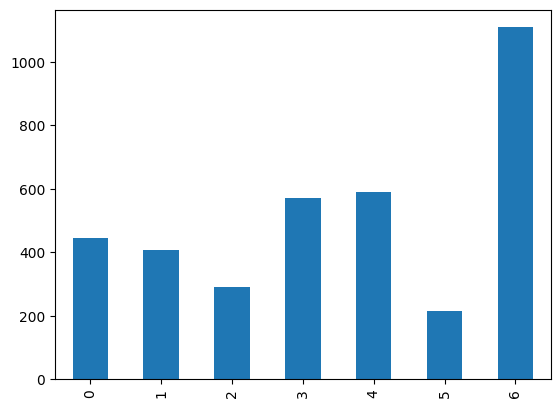

In [9]:
df['class'].value_counts().sort_index().plot.bar()

In [10]:
df.shape

(3629, 2)

In [11]:
df["class"].value_counts()

6    1109
4     590
3     570
0     446
1     408
2     291
5     215
Name: class, dtype: int64

**k-mer counting**
K-mers are short, fixed-length sequences of DNA or other biological data.

Use of k-mers is a simple function to convert DNA sequences into k-mers, allowing you to analyze patterns and frequencies in your genomic data.

In [12]:
def getKmers(sequence, size=6):
    kmers = []
    for i in range(len(sequence) - size + 1):
        kmer = sequence[i:i+size].lower()
        kmers.append(kmer)
    return kmers

In [13]:
#Now lets convert our data sequences into short overlapping k-mers of legth 6.

df['gene_sequence'] = df.apply(lambda x: getKmers(x['sequence']), axis=1)

In [14]:
df

,sequence,class,gene_sequence
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."
...,...,...,...
4275,ATGAATGACACAGTTAACAAAACAGATCAAGTGGACTGCAGCGACC...,6,"[atgaat, tgaatg, gaatga, aatgac, atgaca, tgaca..."
4276,ATGAGCTCCTTCAAGCGGGGCTCGCTCAAGAGCTCCACATCAGGGT...,5,"[atgagc, tgagct, gagctc, agctcc, gctcct, ctcct..."
4277,ATGGGTCAGAAATCTTGGATAGAGAAAACCTTTTGCAAACGGGAAT...,5,"[atgggt, tgggtc, gggtca, ggtcag, gtcaga, tcaga..."
4278,ACGAAAGACTCTAACAGGTGTTGCTGTGGCCAGTTCACCAACCAGC...,5,"[acgaaa, cgaaag, gaaaga, aaagac, aagact, agact..."


In [15]:
df = df.drop("sequence", axis = 1)

In [16]:
df.head(2)

,class,gene_sequence
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."


In [17]:
df.shape

(3629, 2)

In [18]:
df['gene_sequence'] = df['gene_sequence'].apply(lambda x: ' '.join(x))

In [19]:
df.head()

,class,gene_sequence
0,4,atgccc tgcccc gcccca ccccaa cccaac ccaact caac...
1,4,atgaac tgaacg gaacga aacgaa acgaaa cgaaaa gaaa...
2,3,atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggca...
3,3,atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggca...
4,3,atgcaa tgcaac gcaaca caacag aacagc acagca cagc...


In [20]:
#applying bag of words

In [21]:
cv = CountVectorizer(ngram_range=(4,4))

In [22]:
x = cv.fit_transform(df["gene_sequence"])

In [23]:
x.shape

(3629, 232414)

In [24]:
y = df["class"]

In [25]:
y.shape

(3629,)

In [26]:
#splitting the data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

**Model Building**

In [27]:
model_RF = RandomForestClassifier()

In [28]:
model_RF.fit(x_train, y_train)

RandomForestClassifier()

In [29]:
y_pred_RF = model_RF.predict(x_test)

In [30]:
cm = confusion_matrix(y_test, y_pred_RF)

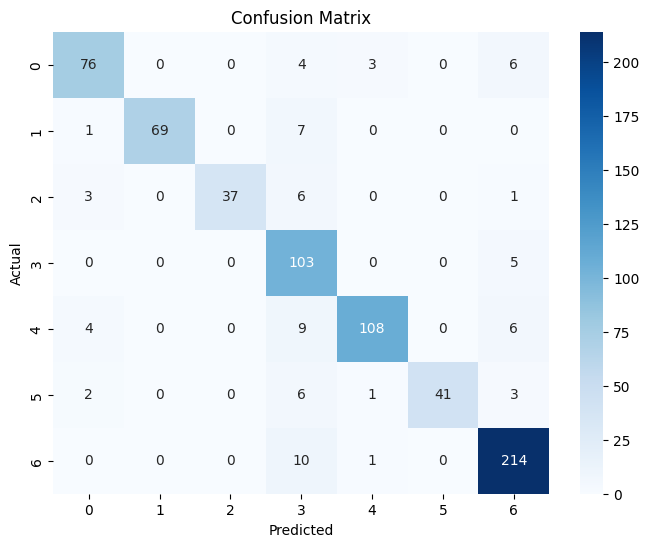

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
print("Accuracy : ", accuracy_score(y_test, y_pred_RF))
print("precision : ", precision_score(y_test, y_pred_RF,average='weighted'))
print("recall : ", recall_score(y_test, y_pred_RF, average='weighted'))
print("f1 score : ", f1_score(y_test, y_pred_RF, average='weighted'))

Accuracy :  0.8925619834710744
precision :  0.9072211462324186
recall :  0.8925619834710744
f1 score :  0.8943623533042092


In [36]:
def predict_gene(input_data):
  kmers = getKmers(input_data)
  kmers = ' '.join(kmers)
  input = cv.transform([kmers])
  predicted_class = model_RF.predict(input)
  return predicted_class

new_data = input("Enter the DNA sequence : ")

gene_class_output = predict_gene(new_data)
print(gene_class_output[0])

Enter the DNA sequence : ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAGGCCTACCCGCCGCAGTACTGATCATTCTATTTCCCCCTCTATTGATCCCCACCTCCAAATATCTCATCAACAACCGACTAATCACCACCCAACAATGACTAATCAAACTAACCTCAAAACAAATGATAACCATACACAACACTAAAGGACGAACCTGATCTCTTATACTAGTATCCTTAATCATTTTTATTGCCACAACTAACCTCCTCGGACTCCTGCCTCACTCATTTACACCAACCACCCAACTATCTATAAACCTAGCCATGGCCATCCCCTTATGAGCGGGCACAGTGATTATAGGCTTTCGCTCTAAGATTAAAAATGCCCTAGCCCACTTCTTACCACAAGGCACACCTACACCCCTTATCCCCATACTAGTTATTATCGAAACCATCAGCCTACTCATTCAACCAATAGCCCTGGCCGTACGCCTAACCGCTAACATTACTGCAGGCCACCTACTCATGCACCTAATTGGAAGCGCCACCCTAGCAATATCAACCATTAACCTTCCCTCTACACTTATCATCTTCACAATTCTAATTCTACTGACTATCCTAGAAATCGCTGTCGCCTTAATCCAAGCCTACGTTTTCACACTTCTAGTAAGCCTCTACCTGCACGACAACACATAA
4


In [34]:
#Pickling the model for building an application
import pickle

In [35]:
model_file = open("DNA_sequencing_model.pkl","wb")
pickle.dump(model_RF, model_file)
model_file.close()

In [37]:
cv_file = open("DNA_sequencing_cv.pkl","wb")
pickle.dump(cv, cv_file)
cv_file.close()